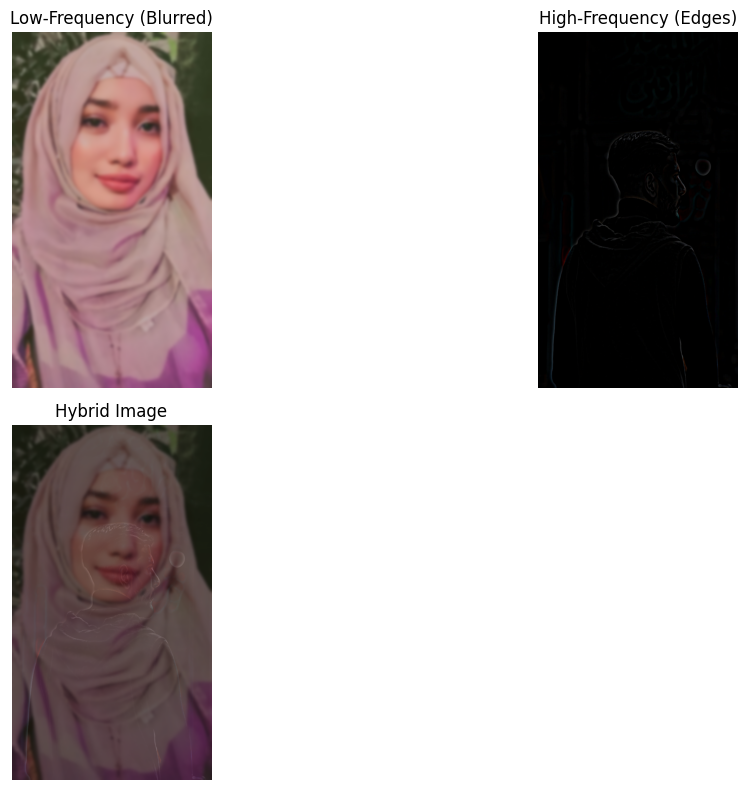

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in color
img1 = cv2.imread("anna.jpg", cv2.IMREAD_COLOR)  # Low-frequency image
img2 = cv2.imread("zaki.jpg", cv2.IMREAD_COLOR)       # High-frequency image

# Check if images are loaded
if img1 is None:
    raise FileNotFoundError("Hamzaprofile.jpg not found or could not be loaded.")
if img2 is None:
    raise FileNotFoundError("Samama.png not found or could not be loaded.")

# Resize images to the same dimensions
rows, cols, _ = img1.shape
img2 = cv2.resize(img2, (cols, rows))

# Apply low-pass and high-pass filters to each channel
low_pass = cv2.GaussianBlur(img1, (31, 31), 0)  # Low-pass filter on img1
blurred = cv2.GaussianBlur(img2, (31, 31), 0)   # Blur img2 for high-pass filter
high_pass = cv2.subtract(img2, blurred)         # High-pass filter on img2

# Combine the low-pass and high-pass images
hybrid_image = cv2.addWeighted(low_pass, 0.5, high_pass, 0.5, 0)

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title("Low-Frequency (Blurred)")
plt.imshow(cv2.cvtColor(low_pass, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("High-Frequency (Edges)")
plt.imshow(cv2.cvtColor(high_pass, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Hybrid Image")
plt.imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis("off")

plt.tight_layout()
plt.show()
